# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas.

1 - A resolução de uma imagem matricial é dada por **altura x largura** em pixels.

In [ ]:

# Verdadeiro

2 - O código abaixo resultará em um caminho que será finalizado ligando o ponto inicial com o ponto final.

```<path d= "M 0 200 q 80 -240 160 0 Z" fill="red" stroke= "white" />```

In [ ]:

# Verdadeiro

3 - Normalmente, são utilizadas **imagens binárias** para **transformações geométricas** em imagens.

In [ ]:

# Verdadeiro

4 - No espaço de cores CMY, a combinação das três cores é o preto. Esse espaço de cores, normalmente, é utilizado para impressões.

In [ ]:

# Verdadeira

5 - Na operação aritmética **Subtração**, pode ocorrer **overflow**.

In [ ]:

# Falso, na operação de subtração ocorre underflow.

# Parte prática

## Material de apoio

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
plt.imshow(img) 
plt.imshow(img, cmap="gray")
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

#### Utilizando o numpy:

Avarage: ```gray = np.average(img,axis=2)```

Luminosity: ```gray = ((0.2126 * img[:, :, 0]) + (0.7152 * img[:, :, 1]) + (0.0722 * img[:, :, 2])).astype(np.uint8)```


### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))

        mario_nn[i, j] = mario[new_y, new_x]
```

### Imagem grayscale para imagem binária de 3 canais

``` 
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        if img[i,j] > thresh: 
            bin[i,j,:] = 255 
        else: 
            bin[i,j,:] = 0

```

### Histogramas 

```
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = int(img[i, j])
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram)
    
def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')   
```

### Realce de Cor | Modificação do brilho

```
photo = np.array(Image.open('photo.jpg'))

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
photo_mul = np.clip(photo * 1.5, 0, 255).astype(np.uint8)
plt.imshow(photo_mul)

plt.subplot(2, 2, 2)
photo_div = (photo / 1.5).astype(np.uint8)
plt.imshow(photo_div)
```


### Monocromático 

```
gray = (Realizar operação de grayscale)
tinted = np.zeros(shape=img.shape, dtype=np.uint8)

# ex: laranja em RGB: (255, 127, 0)

tinted[:, :, 0] = gray * (255 / 255)
tinted[:, :, 1] = gray * (127 / 255)
tinted[:, :, 2] = gray * (  0 / 255)
```

**1 -** Importe as bibliotecas que serão usadas.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**2 -** Abra as imagens **sunflower.png** e **horse.jpg**, mostre as dimensões de cada uma, retire o canal alpha se necessário e exiba essas imagens. Indique se há ou não o canal alpha.

(113, 150, 3)
(768, 1024, 3)


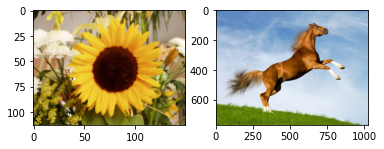

In [5]:
img1 = Image.open("sunflower.png")
img_sunflower_array = np.array(img1)
img2 = Image.open("horse.jpg")
img_horse_array = np.array(img2)

img_sunflower_array = img1_array[:,:,:3]
img_horse_array = img2_array[:,:,:3]

plt.subplot(1,2,1)
plt.imshow(img_sunflower_array)
print(img_sunflower_array.shape)
plt.subplot(1,2,2)
plt.imshow(img_horse_array)
print(img_horse_array.shape)

#Não há canal alpha!

**3 -** Crie uma função que receba como parâmetro uma imagem colorida e retorne sua versão em grayscale com um método de sua escolha. Aplique a função na imagem **horse** e exiba o resultado.

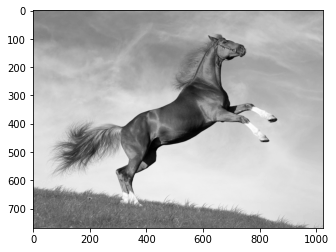

In [10]:
def grayscale(img_np):
    (l,c,p) = img_np.shape
    img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(img_np[i, j, 0])
            g = float(img_np[i, j, 1])
            b = float(img_np[i, j, 2])

            img_avg[i, j] = 0.2126*r + 0.7152*g + 0.0722*b
    return img_avg

img_horse_gray = grayscale(img_horse_array)
plt.imshow(img_horse_gray,cmap = 'gray') 

**4 -** Crie uma função que receba uma **imagem em grayscale** e retorne sua versão **binária**. A função deve receber como parâmetro a **imagem em grayscale** e o **valor de threshold**. Aplique essa função na **imagem resultante da questão 3** com o valor de **threshold igual a 125** e exiba o resultado.

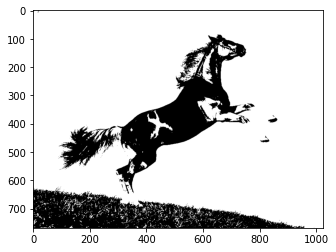

In [18]:
def binary(img, thresh):
    (l,c) = img.shape
    bin = np.zeros(shape=(l,c,3),dtype=np.uint8)

    for i in range(l):
        for j in range(c):
            if img[i,j] > thresh: 
                bin[i,j,:] = 255 
            else: 
                bin[i,j,:] = 0
    return bin

img_horse_bin = binary(img_horse_gray,125)
plt.imshow(img_horse_bin, cmap = 'gray')

**5 -** Crie uma função que receba uma **imagem colorida** e retorne sua versão em um espectro **monocromático**. A função deve receber como parâmetro a **imagem colorida** e os valores de **R**, **G** e **B** e retornar a imagem monocromática, utilizando a cor **RGB(221,160,221)**. Aplique essa função na imagem **sunflower** e exiba o resultado.

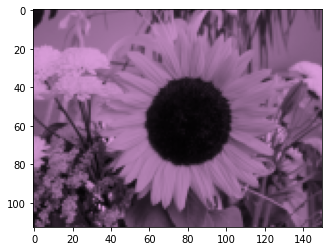

In [23]:
def monochromatic(img,r,g,b):
    gray = grayscale(img)
    tinted = np.zeros(shape=img.shape, dtype=np.uint8)

    tinted[:, :, 0] = gray * (r / 255)
    tinted[:, :, 1] = gray * (g / 255)
    tinted[:, :, 2] = gray * (b / 255)
    
    return tinted

img_sunflower_mc = monochromatic(img_sunflower_array,221,160,221)
plt.imshow(img_sunflower_mc)

**6-** Mostre o histograma em **grayscale** da imagem **horse em grayscale** calculada na **questão 3**.

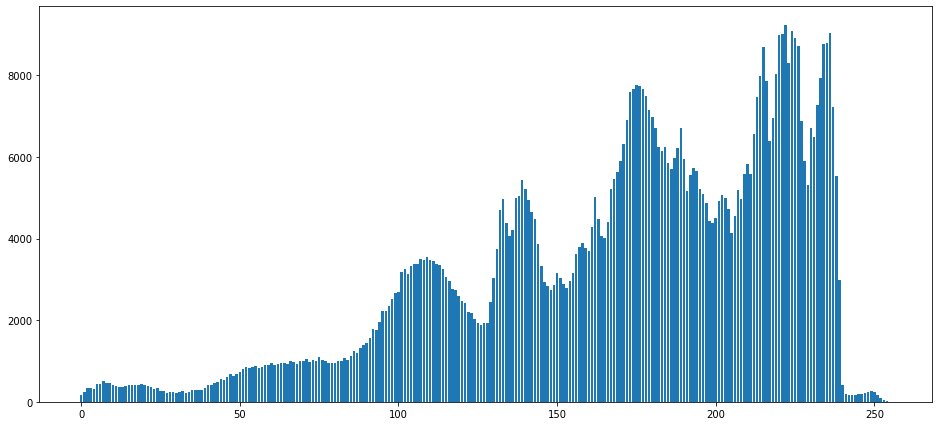

In [24]:
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = int(img[i, j])
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram)
    
show_histogram_gray(img_horse_gray)

**7 -** Crie uma função para aumentar ou diminuir a iluminação de uma imagem, ela deve receber como parâmetro a imagem original e o fator de iluminaçã que deverá ser aplicado. Aplique a função na imagem **horse** diminuindo a iluminação em **50%**. Exiba o resultado.

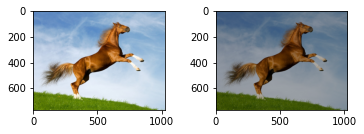

In [47]:
def lux(img,percent):
    percent = percent/100
    
    #ANTES
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    
    #DEPOIS
    plt.subplot(2, 2, 2)
    img_div = (img / percent).astype(np.uint8)
    plt.imshow(img_div)
    
lux(img_horse_array,150)

**8 -** Crie uma função que realize o escalonamento de uma imagem que receba como parâmetro uma imagem, sx e sy, sendo sx e sy os fatores de escalonamento e retorne a imagem escalonada. Em seguida, aplique o escalonamento, com sx e sy iguais a 2, na imagem **sunflower** e exiba o resultado.

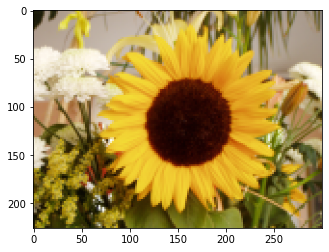

In [31]:
def scale(img,sx,sy):
    (l,c,p) = img.shape
    (ls, cs) = l * sy, c * sx
    new_img = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    for i in range(ls):
        for j in range(cs):
            new_y = int(np.floor(i * (l / ls)))
            new_x = int(np.floor(j * (c / cs)))

            new_img[i, j] = img[new_y, new_x]
    return new_img

img_sunflower_scale = scale(img_sunflower_array,2,2)
plt.imshow(img_sunflower_scale)        

**9 -** Salve a imagem da questão **8** no disco com o nome "resultado.jpg"

In [33]:
Image.fromarray(img_sunflower_scale).save("resultado.jpg")
